In [1]:
bids_folder = '/data/ds-tmsrisk/'
import os.path as op
import arviz as az

from tms_risk.cogmodels.fit_model import build_model, get_data
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
from tqdm.notebook import tqdm

In [3]:
dfs = []
models = []
idatas = []


model_labels = ['flexible1', 'flexible1.4', 'flexible1_null', 'flexible1_null.4', 'flexible1b', 'flexible1b.4', 'flexible1c', 'flexible1c.4', 'flexible2', 'flexible2.4']
model_labels = ['flexible1.4', 'flexible1b.4', 'flexible1c.4']

for model_label in tqdm(model_labels):
    dfs.append(get_data(model_label=model_label))
    models.append(build_model(model_label, dfs[-1]))
    idatas.append(az.from_netcdf(op.join(bids_folder, 'derivatives', 'cogmodels', f'model-{model_label}_trace.netcdf')))

  0%|          | 0/3 [00:00<?, ?it/s]

/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:150: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:150: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


/Users/gdehol/git/tms_risk/tms_risk/utils/data.py:150: UserWarning: Subject 10/session 1 has only 5 runs!!
  warnings.warn('Subject 10/session 1 has only 5 runs!!')


Dropping the baseline condition


In [4]:
for model, idata in tqdm(list(zip(models, idatas))):
    model.build_estimation_model()
    with model.estimation_model:
        pm.compute_log_likelihood(idata)

  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
model_mapping = {'flexible1': 'Flexible 1', 'flexible1.4': 'Flexible 1 (4 parameters)', 'flexible1_null': 'Flexible 1 (null)', 'flexible1_null.4': 'Flexible 1 (null, 4 parameters)',
                'flexible1b': 'Flexible 1 (TMS affects only 2nd option)', 'flexible1b.4': 'Flexible 1 (TMS affect only 2nd option, 4 parameters)',
                'flexible1c': 'Flexible 1 (TMS affects only 1nd option)', 'flexible1c.4': 'Flexible 1 (TMS affect only 1st option, 4 parameters)',
                'flexible2': 'Flexible 2 (perceptuap/memory parameters)', 'flexible2.4': 'Flexible 2 (perceptual/memory parameters, 4 parameters)'}

In [6]:
models = {}
for model_label, idata in zip(model_labels, idatas):
    models[model_mapping[model_label]] = idata

In [7]:
comparison = az.compare(models)

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

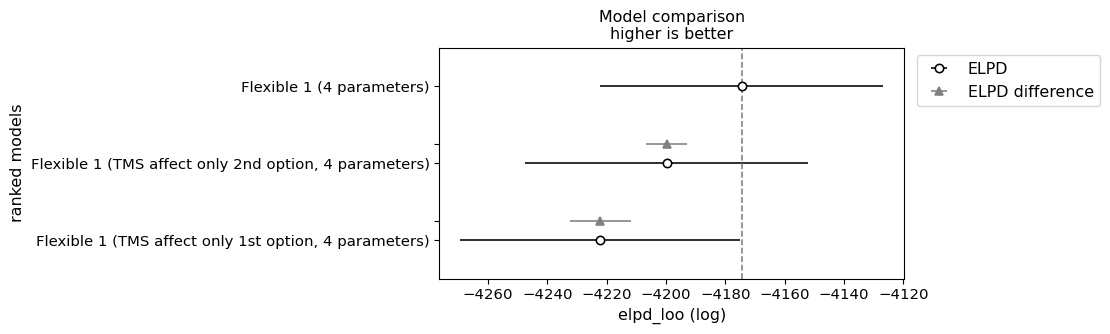

In [8]:
az.plot_compare(comparison)

In [9]:
comparison

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Flexible 1 (4 parameters),0,-4174.498826,261.705731,0.000000,0.929611,47.718282,0.000000,True,log
"Flexible 1 (TMS affect only 2nd option, 4 parameters)",1,-4199.758959,230.272618,25.260133,0.000000,47.727050,6.926314,True,log
"Flexible 1 (TMS affect only 1st option, 4 parameters)",2,-4222.089772,222.874589,47.590946,0.070389,47.208954,10.398291,True,log


In [10]:
comparison = az.compare(models, 'waic')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/gdehol/mambaforge/lib/python3.10/site-packages/arviz/stats/stats.py:1645: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_waic (log)', ylabel='ranked models'>

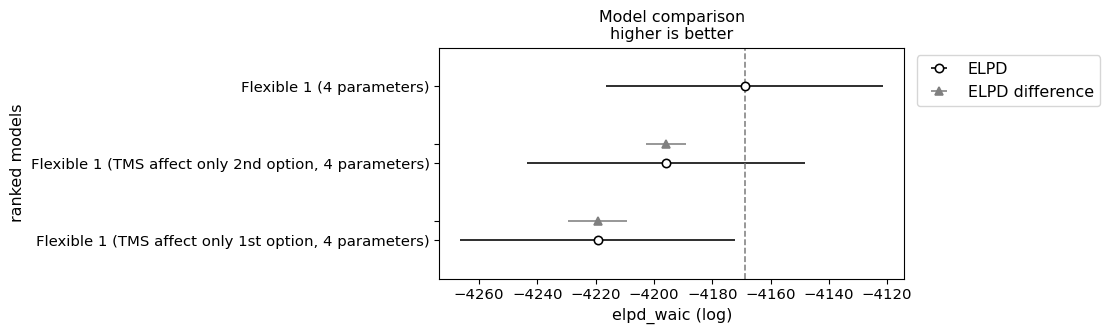

In [11]:
az.plot_compare(comparison)

In [12]:
idatas[6].posterior

IndexError: list index out of range

In [22]:
idatas[6]

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [30]:
models[model_mapping['flexible1c.4']]

with models[model_mapping['flexible1c.4']].estimation_model:
    prior = pm.sample_prior_predictive()
    idata[6].extend(prior)

AttributeError: 'InferenceData' object has no attribute 'build_estimation_model'

array([[<Axes: >, <Axes: xlabel='n1_evidence_sd_poly1_mu\nIntercept'>],
       [<Axes: >,
        <Axes: xlabel='n1_evidence_sd_poly1_mu\nstimulation_condition[T.vertex]'>]],
      dtype=object)

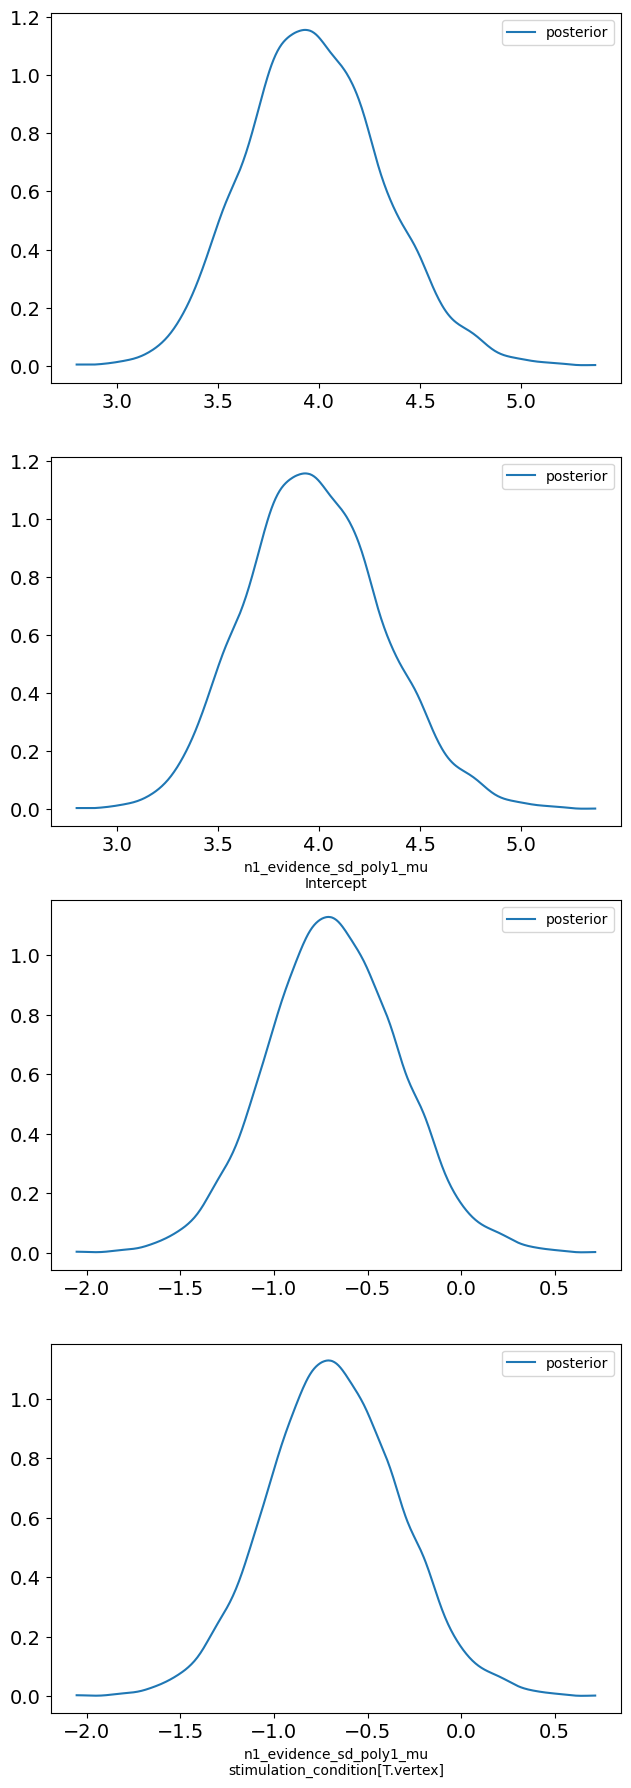

In [23]:
az.plot_dist_comparison(idatas[6], var_names=["n1_evidence_sd_poly1_mu"])